In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as la
import argparse
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import sys
sys.path.append("../") 
from utils_quadratic import *
import scipy.linalg  as sla
import random
%load_ext autoreload
%autoreload 2

## Checking convergence of gradient descent to Nash equilibrium

In [2]:
rng= list(range(1, 100000)) # list of integers from 1 to 99
                           # adjust this boundaries to fit your needs
random.shuffle(rng)

d = 2

eta_init = 0.01
MAXINNER = 2000
u = np.ones(d)
x0 = np.ones(2*d)

i=0
for i in range(10000):
    np.random.seed(rng[i])
    A1 = 1*np.random.randn(d, d)
    Q1 = 0.5*np.random.randn(d, d)
    Q1 = np.dot(Q1, Q1.T)

    A2 = 1*np.random.randn(d, d)
    Q2 = 0.5*np.random.randn(d, d)
    Q2 = np.dot(Q2,Q2.T)
    game = quadratic(Q1, Q2, A1, A2, eta_init, MAXINNER, u, d)
    eigs=game.get_alpha_L(u)
    alpha=min(eigs)
    L=max(eigs)
    gamma_bound=alpha/(2*L**2)
    if game.check_jacobian(u)==True and gamma_bound>=1e-3:

        break
    i+=1
print(i,rng[i])


45 68851


In [3]:
seed=rng[i]

In [4]:
eigs=game.get_alpha_L(u)
alpha=min(eigs)
L=max(eigs)
gamma_bound=alpha/(2*L**2)
print("gamma bound={:.5f}".format(gamma_bound), alpha, L)
u=np.hstack((u,u))
x1d,x2d = game.runGradPlay(x0,u,eta=gamma_bound, M=1000)
nash=game.get_nash()
x1n = nash[0:d]
x2n = nash[d:2*d]

gamma bound=0.00240 0.032769382661416824 2.6119498249286446


In [8]:
import pickle as pk
#data_out={'game': game,  'u0': u0, 'x0': x0, 'data_dfo': data, 'seed': seed}
data_in=pk.load(open('example_game.pk', 'rb'))

In [9]:
game=data_in['game']
u0=data_in['u0']
x0=data_in['x0']
seed=data_in['seed']

In [10]:
ud=1*np.array([1,1,1,1])
print(ud)
agent_dim=d
#seed=42
#u0=np.random.rand(2*d)
ix=Incent(ud,agent_dim, game, seed=seed, UDCOST=True)

[1 1 1 1]


In [11]:
x0, ix.game.get_xd(ud), ix.alpha

(array([1., 1., 1., 1.]),
 array([-0.15957461, -1.84458514, -5.48639112, -3.09574581]),
 0.13202719613294853)

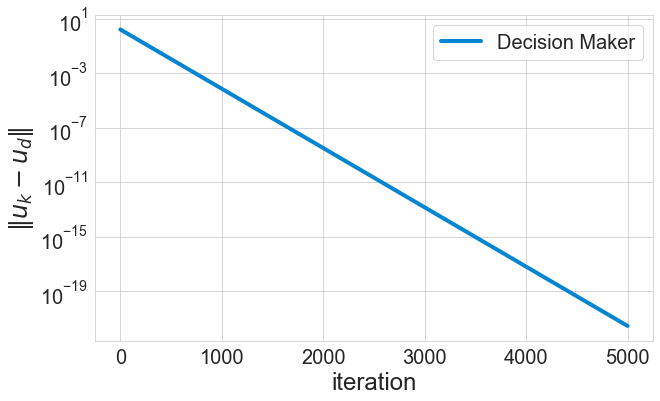

In [39]:
dataRGM=ix.runIncentRGM(u0,x0, BRFLAG=False)
err=dataRGM['err']
plt.figure(figsize=(10, 6))
fs=24
plt.plot(err, label='Decision Maker', color='xkcd:cerulean', linewidth=4)

plt.xlabel('iteration', fontsize=fs)
plt.ylabel('$\Vert u_k-u_d\Vert$', fontsize=fs)
plt.yscale('log') 
plt.legend(fontsize=fs-4)
plt.grid(True)
plt.tick_params(labelsize=fs-4)

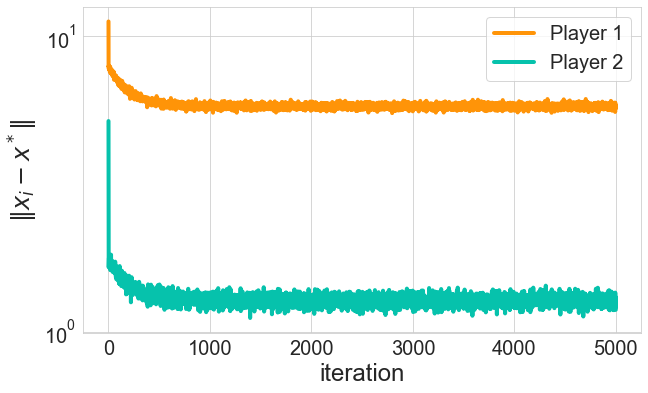

In [40]:
x=dataRGM['x0s']
x1=x[:,0:d]
x2=x[:,d:2*d]
x1_err=np.asarray([la.norm(x_-x1n)**2 for x_ in x1])
x2_err=np.asarray([la.norm(x_-x2n)**2 for x_ in x2])
fs=24
cols=['xkcd:tangerine', 'xkcd:turquoise']
lines=['-',"--"]
if 0:
    plt.figure(figsize=(10, 6))
    i=0 
    plt.plot(x1[:,i], label='Player 1', color=cols[0],linestyle=lines[i], linewidth=4)
    plt.plot(x2[:,i], label='Player 2', color=cols[1],linestyle=lines[i], linewidth=4)
    i=1
    plt.plot(x1[:,i],  color=cols[0],linestyle=lines[i], linewidth=4)
    plt.plot(x2[:,i], color=cols[1],linestyle=lines[i], linewidth=4)
    plt.xlabel('iteration', fontsize=fs)
    plt.ylabel('$x_{i,k}$', fontsize=fs)
    plt.yscale('log') 
    plt.legend(fontsize=fs-4)
    plt.grid(True)
    plt.tick_params(labelsize=fs-4)

plt.figure(figsize=(10, 6))
fs=24
plt.plot(x1_err, label='Player 1', color=cols[0],linestyle=lines[0], linewidth=4)
plt.plot(x2_err, label='Player 2', color=cols[1],linestyle=lines[0], linewidth=4)
plt.xlabel('iteration', fontsize=fs)
plt.ylabel('$\Vert x_{i}-x^*\Vert$', fontsize=fs)
plt.yscale('log') 
plt.legend(fontsize=fs-4)
plt.grid(True)
plt.tick_params(labelsize=fs-4)

## Testing runIncentDFO
if you change the `BRFLAG` variable to `True` then it it will run DFO with the user doing best response instead of stochastic gradient play. 

In [51]:
data=ix.runIncentDFO(u0,x0, eta=0.0001, BRFLAG=True, DECAY=False,MAXINNER=250, MAXOUTER=50000,delta=1 )
err=data['err']
plt.figure(figsize=(10, 6))
fs=24
plt.plot(err, label='Decision Maker', color='xkcd:cerulean', linewidth=4)

plt.xlabel('iteration', fontsize=fs)
plt.ylabel('$\Vert u_k-u_d\Vert$', fontsize=fs)
plt.yscale('log') 
plt.legend(fontsize=fs-4)
plt.grid(True)
plt.tick_params(labelsize=fs-4)

0.13202719613294853

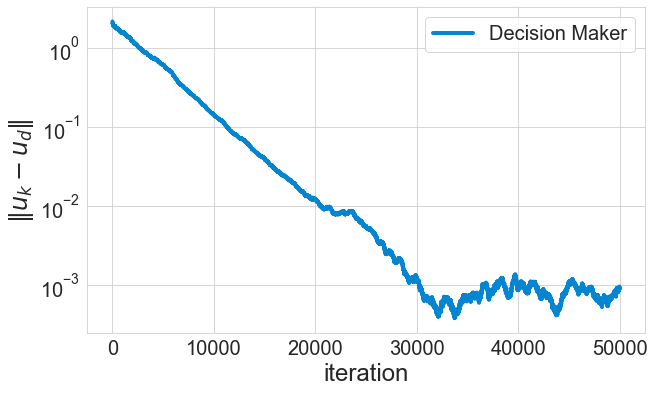

In [12]:
data=ix.runIncentDFO(u0,x0, eta=0.0001, BRFLAG=False, DECAY=False,MAXINNER=250, MAXOUTER=50000,delta=1 )
err=data['err']
plt.figure(figsize=(10, 6))
fs=24
plt.plot(err, label='Decision Maker', color='xkcd:cerulean', linewidth=4)

plt.xlabel('iteration', fontsize=fs)
plt.ylabel('$\Vert u_k-u_d\Vert$', fontsize=fs)
plt.yscale('log') 
plt.legend(fontsize=fs-4)
plt.grid(True)
plt.tick_params(labelsize=fs-4)

In [ ]:
import pickle as pk
data_out={'game': game, 'ix': ix, 'u0': u0, 'x0': x0, 'data_dfo': data}
pk.dump()

In [21]:
x=data['x0s']
x.shape, d

((5001, 4), 2)

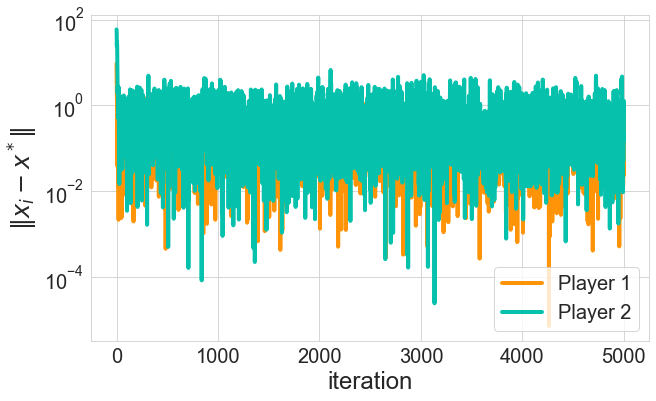

In [55]:
x=data['x0s']
x1=x[:,0:d]
x2=x[:,d:2*d]
x1_err=np.asarray([la.norm(x_-x1n)**2 for x_ in x1])
x2_err=np.asarray([la.norm(x_-x2n)**2 for x_ in x2])
fs=24
cols=['xkcd:tangerine', 'xkcd:turquoise']
lines=['-',"--"]
if 0:
    plt.figure(figsize=(10, 6))
    i=0 
    plt.plot(x1[:,i], label='Player 1', color=cols[0],linestyle=lines[i], linewidth=4)
    plt.plot(x2[:,i], label='Player 2', color=cols[1],linestyle=lines[i], linewidth=4)
    i=1
    plt.plot(x1[:,i],  color=cols[0],linestyle=lines[i], linewidth=4)
    plt.plot(x2[:,i], color=cols[1],linestyle=lines[i], linewidth=4)
    plt.xlabel('iteration', fontsize=fs)
    plt.ylabel('$x_{i,k}$', fontsize=fs)
    plt.yscale('log') 
    plt.legend(fontsize=fs-4)
    plt.grid(True)
    plt.tick_params(labelsize=fs-4)

plt.figure(figsize=(10, 6))
fs=24
plt.plot(x1_err, label='Player 1', color=cols[0],linestyle=lines[0], linewidth=4)
plt.plot(x2_err, label='Player 2', color=cols[1],linestyle=lines[0], linewidth=4)
plt.xlabel('iteration', fontsize=fs)
plt.ylabel('$\Vert x_{i}-x^*\Vert$', fontsize=fs)
plt.yscale('log') 
plt.legend(fontsize=fs-4)
plt.grid(True)
plt.tick_params(labelsize=fs-4)

## Testing runIncentBR

In [166]:
data=ix.runIncentBR(u0)
err=data['err']
plt.figure(figsize=(10, 6))
fs=24
plt.plot(err, label='Decision Maker', color='xkcd:cerulean', linewidth=4)

plt.xlabel('iteration', fontsize=fs)
plt.ylabel('$\Vert u_k-u_d\Vert$', fontsize=fs)
plt.yscale('log') 
plt.legend(fontsize=fs-4)
plt.grid(True)
plt.tick_params(labelsize=fs-4)

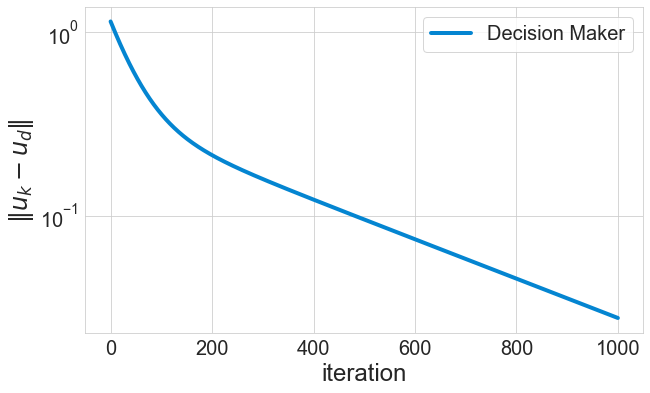

In [167]:
#err, us, x0s=runIncentDFO(u0, x0)
plt.figure(figsize=(10, 6))
fs=24
plt.plot(err, label='Decision Maker', color='xkcd:cerulean', linewidth=4)

plt.xlabel('iteration', fontsize=fs)
plt.ylabel('$\Vert u_k-u_d\Vert$', fontsize=fs)
plt.yscale('log') 
plt.legend(fontsize=fs-4)
plt.grid(True)
plt.tick_params(labelsize=fs-4)

## Old

In [93]:
x1d,x2d = game.runGradPlay(x0,eta=gamma_bound/4, M=10000)
nash= game.solve_nash(x0)
nash_0 = nash_[0:3]
nash_1 = nash_[3:6]

In [95]:
x1d[-1], nash_0

(array([ 0.02961458, -0.1658125 , -0.10824743]),
 array([-0.45853191,  0.20890753, -0.2954973 ]))

In [79]:
history_0, history_1, cost_0, cost_1 = game.runSGDPlay_(var=0.01,eta=gamma_bound)
nash= game.solve_nash(x0)
nash_0 = nash_[0:3]
nash_1 = nash_[3:6]

In [478]:
game.check_jacobian(u)

True

In [479]:
nash_0

array([-0.52319411, -0.96105537,  0.2775525 ])

In [40]:
nash_1

array([-0.15975917, -0.02162412, -0.52166791])

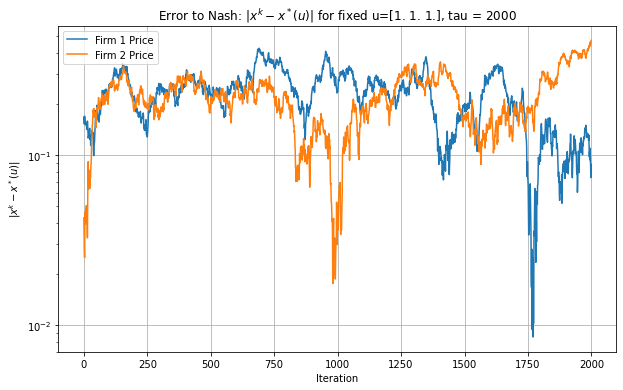

In [81]:
plt.figure(figsize=(10, 6))

plt.plot([np.linalg.norm(price- nash_0) for price in history_0], label='Firm 1 Price')
plt.plot([np.linalg.norm(price - nash_1) for price in history_1], label='Firm 2 Price')

plt.title('Error to Nash: $\|x^k-x^*(u)\|$ for fixed u='+str(u) + ', tau = ' + str(game.MAXINNER) )
plt.xlabel('Iteration')
plt.ylabel('$\|x^k-x^*(u)\|$')
plt.yscale('log') 
plt.legend()
plt.grid(True)
plt.show()

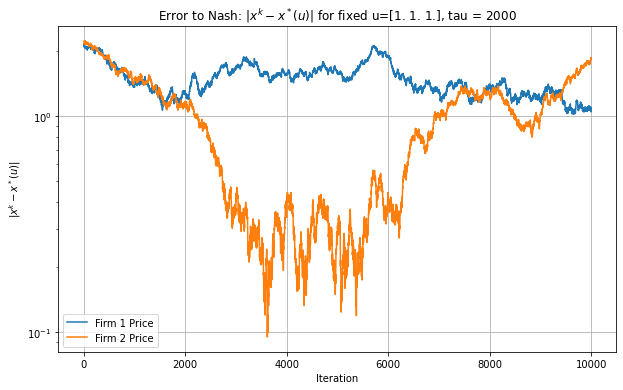

In [88]:
plt.figure(figsize=(10, 6))

plt.plot([np.linalg.norm(price- nash_0) for price in x1], label='Firm 1 Price')
plt.plot([np.linalg.norm(price - nash_1) for price in x2], label='Firm 2 Price')

plt.title('Error to Nash: $\|x^k-x^*(u)\|$ for fixed u='+str(u) + ', tau = ' + str(game.MAXINNER) )
plt.xlabel('Iteration')
plt.ylabel('$\|x^k-x^*(u)\|$')
plt.yscale('log') 
plt.legend()
plt.grid(True)
plt.show()

## Checking convergence of SGD

In [498]:
random.seed(42)
d = 3

A1 = np.random.randn(d, d)
Q1 = np.random.randn(d, d)
Q1 = np.dot(Q1, Q1.T)

A2 = np.random.randn(d, d)
Q2 = np.random.randn(d, d)
Q2 = np.dot(Q2,Q2.T)
eta_init = 0.01
MAXINNER = 3000
u = np.ones(d)
x0 = np.ones(2*d)

game = quadratic(Q1, Q2, A1, A2, eta_init, MAXINNER, u, d)

while game.check_jacobian(u) == False:
    A1 = np.random.randn(d, d)
    Q1 = np.random.randn(d, d)
    Q1 = np.dot(Q1, Q1.T)

    A2 = np.random.randn(d, d)
    Q2 = np.random.randn(d, d)
    Q2 = np.dot(Q2,Q2.T)
    game = quadratic(Q1, Q2, A1, A2, eta_init, MAXINNER, u, d)



In [499]:
history_0, history_1, costs_0, cost_1 = game.runSGDPlay(0.0001)
nash= game.solve_nash(x0)
nash_0 = nash[0:3]
nash_1 = nash[3:6]

[2.36975789 3.67534902 5.32563477]
[0.97668037 0.96161343 0.94512092]
[2.39712815 3.5063118  5.16275778]
[0.95298105 0.92489745 0.89186936]
[2.41272555 3.35162712 5.00350922]
[0.92874849 0.88980635 0.84043872]
[2.42126192 3.20727447 4.84653436]
[0.90468447 0.85625258 0.79022928]
[2.42109191 3.07539204 4.69396765]
[0.88037974 0.8242482  0.74175138]
[2.4141957  2.95271579 4.54406309]
[0.85614278 0.79352467 0.69476813]
[2.40133889 2.83921652 4.39805517]
[0.83175425 0.7639242  0.64933939]
[2.38434857 2.73280406 4.2549218 ]
[0.80787769 0.73567017 0.60540503]
[2.36475548 2.63226624 4.11571985]
[0.78420802 0.70832422 0.56283205]
[2.33949696 2.53957325 3.97958896]
[0.76046789 0.68198126 0.52168169]
[2.31161264 2.45255802 3.84714859]
[0.73702319 0.6566394  0.48166645]
[2.28246729 2.36904152 3.71791612]
[0.71397992 0.63201604 0.44324821]
[2.25031451 2.29163367 3.5919856 ]
[0.69114789 0.60830886 0.40612551]
[2.21474053 2.21949069 3.4691791 ]
[0.66847442 0.58543021 0.37038476]
[2.17882058 2.149749

[-2.68261795 -1.24462293 -0.73329421]
[10. 10. 10.]
[-2.68251156 -1.24465623 -0.73333026]
[10. 10. 10.]
[-2.68244459 -1.24467719 -0.73335295]
[10. 10. 10.]
[-2.68230176 -1.2447219  -0.73340134]
[10. 10. 10.]
[-2.68237378 -1.24469935 -0.73337694]
[10. 10. 10.]
[-2.68233422 -1.24471174 -0.73339034]
[10. 10. 10.]
[-2.68236698 -1.24470148 -0.73337924]
[10. 10. 10.]
[-2.68224628 -1.24473926 -0.73342014]
[10. 10. 10.]
[-2.68217661 -1.24476107 -0.73344375]
[10. 10. 10.]
[-2.68211324 -1.24478091 -0.73346522]
[10. 10. 10.]
[-2.68203952 -1.24480398 -0.7334902 ]
[10. 10. 10.]
[-2.68167982 -1.24491657 -0.73361208]
[10. 10. 10.]
[-2.68142546 -1.24499619 -0.73369827]
[10. 10. 10.]
[-2.68167934 -1.24491672 -0.73361224]
[10. 10. 10.]
[-2.68168255 -1.24491572 -0.73361115]
[10. 10. 10.]
[-2.68161482 -1.24493692 -0.7336341 ]
[10. 10. 10.]
[-2.68163818 -1.24492961 -0.73362619]
[10. 10. 10.]
[-2.68143223 -1.24499407 -0.73369597]
[10. 10. 10.]
[-2.68148827 -1.24497653 -0.73367698]
[10. 10. 10.]
[-2.68187841

[-2.68041926 -1.24531115 -0.7340392 ]
[10. 10. 10.]
[-2.68015775 -1.245393   -0.73412781]
[10. 10. 10.]
[-2.68027286 -1.24535697 -0.73408881]
[10. 10. 10.]
[-2.68034639 -1.24533396 -0.73406389]
[10. 10. 10.]
[-2.68058067 -1.24526062 -0.73398451]
[10. 10. 10.]
[-2.68048992 -1.24528903 -0.73401526]
[10. 10. 10.]
[-2.68077686 -1.24519921 -0.73391803]
[10. 10. 10.]
[-2.68090205 -1.24516002 -0.73387561]
[10. 10. 10.]
[-2.68087565 -1.24516829 -0.73388456]
[10. 10. 10.]
[-2.68100899 -1.24512655 -0.73383938]
[10. 10. 10.]
[-2.6811288  -1.24508905 -0.73379878]
[10. 10. 10.]
[-2.68107507 -1.24510587 -0.73381699]
[10. 10. 10.]
[-2.68095122 -1.24514463 -0.73385895]
[10. 10. 10.]
[-2.68087889 -1.24516727 -0.73388346]
[10. 10. 10.]
[-2.68091213 -1.24515687 -0.7338722 ]
[10. 10. 10.]
[-2.68092465 -1.24515295 -0.73386796]
[10. 10. 10.]
[-2.68071752 -1.24521778 -0.73393814]
[10. 10. 10.]
[-2.68062651 -1.24524627 -0.73396898]
[10. 10. 10.]
[-2.68067674 -1.24523055 -0.73395196]
[10. 10. 10.]
[-2.68055773

[-2.68116083 -1.24507902 -0.73378793]
[10. 10. 10.]
[-2.68133646 -1.24502405 -0.73372842]
[10. 10. 10.]
[-2.68141815 -1.24499848 -0.73370074]
[10. 10. 10.]
[-2.68149607 -1.24497409 -0.73367434]
[10. 10. 10.]
[-2.6815058  -1.24497104 -0.73367104]
[10. 10. 10.]
[-2.68145769 -1.2449861  -0.73368734]
[10. 10. 10.]
[-2.68123776 -1.24505494 -0.73376186]
[10. 10. 10.]
[-2.68106522 -1.24510895 -0.73382033]
[10. 10. 10.]
[-2.68120696 -1.24506459 -0.7337723 ]
[10. 10. 10.]
[-2.68114699 -1.24508335 -0.73379262]
[10. 10. 10.]
[-2.68109411 -1.24509991 -0.73381054]
[10. 10. 10.]
[-2.68123226 -1.24505667 -0.73376373]
[10. 10. 10.]
[-2.6811227  -1.24509096 -0.73380085]
[10. 10. 10.]
[-2.68106107 -1.24511025 -0.73382173]
[10. 10. 10.]
[-2.68116991 -1.24507618 -0.73378485]
[10. 10. 10.]
[-2.68100466 -1.24512791 -0.73384085]
[10. 10. 10.]
[-2.68114929 -1.24508264 -0.73379184]
[10. 10. 10.]
[-2.68133414 -1.24502478 -0.73372921]
[10. 10. 10.]
[-2.6810656  -1.24510883 -0.7338202 ]
[10. 10. 10.]
[-2.68092125

In [500]:
game.check_jacobian(u)

True

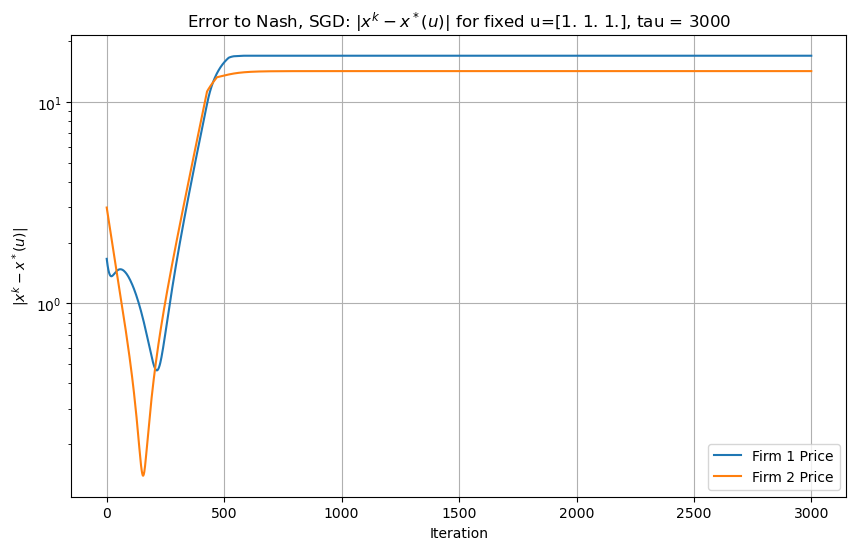

In [501]:
plt.figure(figsize=(10, 6))

plt.plot([np.linalg.norm(price- nash_0) for price in history_0], label='Firm 1 Price')
plt.plot([np.linalg.norm(price - nash_1) for price in history_1], label='Firm 2 Price')

plt.title('Error to Nash, SGD: $\|x^k-x^*(u)\|$ for fixed u='+str(u) + ', tau = ' + str(game.MAXINNER) )
plt.xlabel('Iteration')
plt.ylabel('$\|x^k-x^*(u)\|$')
plt.yscale('log') 
plt.legend()
plt.grid(True)
plt.show()